# Numerical exercise
Kristine Schüller and Sigrid Aunsmo

In [1]:
h_bar=1
m=1
k_0=20
L=20
t_0=0


## problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt 


sigma_x=2 #??
xs=5 #bare satte 5 fordi vi skal ha den verdien etterhvert
C=1 #blehh bare satte noe, vi må vel normalisere
Nx= 10000000



#finding E and omega based on forumula in text
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar


#Function to calculate imaginary part of psi
def find_psi_im(x,t):
    return C*np.exp(-(x-xs)**2/(2*sigma_x**2))*np.sin(k_0*x-omega*t)

#function to calculate real part of psi 
def find_psi_re(x,t):
    return C*np.exp(-(x-xs)**2/(2*sigma_x**2))*np.cos(k_0*x-omega*t)


#guessing a value for delta_t
delta_t=1e-15

#defining delta_x
delta_x= L/(Nx)
print("DX",delta_x)

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
x=np.arange(0,L,delta_x)


psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)

#normalization
psi_i=psi_i/np.linalg.norm(psi_i)
psi_r=psi_r/np.linalg.norm(psi_r)

#plotting
plt.plot(x,psi_i)
plt.show()

plt.plot(x,psi_r)
plt.show()

psi_squared=find_psi_im(x,0)**2+find_psi_re(x,0)**2
plt.plot(x,psi_squared)
plt.show()



DX 2e-06


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

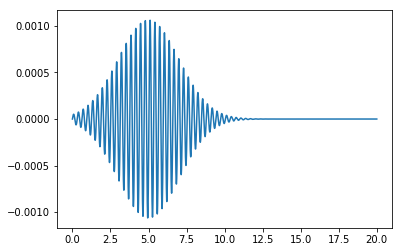

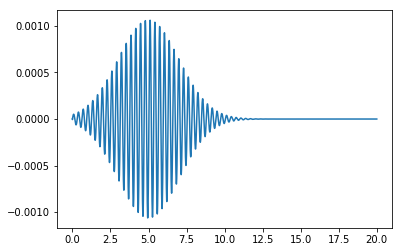

In [ ]:
xlen=Nx
tlen=Nx

dt=1e-10
dx=2e-06

V=np.zeros(len(x))

def next_psi(xarray,timesteps,psi_r_0,psi_i_0,dt,dx):
    psi_i=psi_i_0
    psi_r=psi_r_0
    for ti in range(timesteps):
        
        new_psi_i=np.zeros(len(psi_i))    
        new_psi_i[1:-1] = psi_i[1:-1] - delta_t *((V[1:-1]/h_bar*psi_r[1:-1]) - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
        psi_i=new_psi_i
        #print((psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2]))
        #print((psi_r[2:],2*psi_r[1:-1],psi_r[:-2]),"!!!!")
        #print(psi_r[500])
        new_psi_r=np.zeros(len(psi_r))
        new_psi_r[1:-1] = psi_r[1:-1] - delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
        psi_r=new_psi_r
        
    return psi_r,psi_i

plt.plot(x,psi_i)
plt.show()
#print((psi_r[2:],2*psi_r[1:-1],psi_r[:-2]),"!!!!")

for i in range(10):
    psi_r,psi_i=next_psi(x,1000,psi_r,psi_i,dt,delta_x)
    plt.plot(x,psi_i)
    plt.show()
"""
def find_next_psi(x,t):
    #psi_r=find_psi_re(x,t)
    for ti in range(t):
        for xi in range(len(x)):
            psi_i=find_psi_im(x,t-(delta_t/2))-dt*((V(x)/h_bar)*find_psi_re(x,t)-(h_bar/(2*m))*(find_psi_re(x+1,t)-2*find_psi_re(x,t)+find_psi_re(x-1,t))/(dx)**2)
            #last_psi_r=psi_r
            psi_r=find_psi_re(x,t)+dt*((V(x)/h_bar)*find_psi_im(x,t+1)-(h_bar/(2*m))*(find_psi_im(x+1,t+1)-2*find_psi_im(x,t+1)+find_psi_im(x-1,t+1))/(dx**2))
            #print(psi_r-last_psi_r)
            
    return psi_r,psi_i


psi_r,psi_i=find_next_psi(x,100)
plt.plot(x,psi_r)
 """
"""
Psi_i=np.zeros((xlen,tlen))
Psi_i[0]=psi_i

Psi_r=np.zeros((xlen,tlen))
Psi_r[0]=psi_r

#print(Psi_r,Psi_i)
dx=0.1
dt=0.1
def V(x):
    return 0

"psi_i og Psi_r er arrays"
def find_psi(Psi_i,Psi_r,xlen,dx,x0,tlen,dt,t0):
    for t in range(t0,tlen-1):
        #find next Psi_r
        for x in range(x0,xlen-1):
            Psi_r[x,t+1]=find_next_psi_re(x,t)
            Psi_i[x,t+1]=find_next_psi_im(x,t)
    return Psi_i,Psi_r

Psi_I,Psi_R=find_psi(Psi_i,Psi_r,xlen,0.1,5,tlen,0.1,0)  

#print(Psi_I,Psi_R)
"""


## problem 2

In [ ]:
x_s=5
L=2*10
x_end=15

v_g=(h_bar*k_0)/m

T= L/(2*v_g)
print(v_g,T)

count=0
t0=0
x0=0

for t in range(t0,tlen-1):
    count+=1
    for X in range(x0,xlen-1):
        psi_i=find_next_psi_re(X,t)
        psi_r=find_next_psi_im(X,t)
    if count%10==0:
        print(psi_i)
        plt.plot(x,psi_i)
        plt.plot(x,psi_r)
    


In [ ]:
"""Sigrids tester"""

def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    #nextPsi_i=np.zeros(len(psi_i)
    psi_i[1:-1] = psi_i[1:-1] - delta_t *((V[1:-1]/h_bar*psi_r[1:-1]) - h_bar/(2*m) *(psi_r[2:]-2*psi[1:-1]+psi[:-2])/delta_t**2)
    return psi_i
                     
def newPsi_re(psi_i,psi,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    #psi_r[1:-1] = 

def propagate_psi_in_time(psi_i,psi_r,delta_x,delta_t,T):
    return 0
    


In [ ]:
"""Sigrids tester"""
%matplotlip notebook 

x=np.arange(0,L,delta_x)
V=np.zeros(len(x))

#initial values 
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)

#normalization
psi_i=psi_i/np.linalg.norm(psi_i)
psi_r=psi_r/np.linalg.norm(psi_r)

fig, ax = plt.subplots()
line, = ax.plot(x, psi_i)


def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    #nextPsi_i=np.zeros(len(psi_i)
    psi_i[1:-1] = psi_i[1:-1] - delta_t *((V[1:-1]/h_bar*psi_r[1:-1]) - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_t**2)
    return psi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    psi_r[1:-1] = psi_r[1:-1] - delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_t**2)

def animate_psi_im(i): 
    newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
    
    line.set_ydata(psi_i)
    


## problem 3

In [ ]:
l=L/50
V0=E/2

def V(x):
    if (L/2-l/2<x)or(L/2+l/2>x):
        return E/2
    else: 
        return 0
    
#funkjsonen skal ta in de siste utregnede psi_r, altså psi_r(T)
def find_transmission_possibility(psi_rT,psi_iTNx):
    t_prob=np.linalg.norm(psi_rT[Nx/2:])
    return t_prob

## problem 4

In [ ]:


"Making a list of 50 different values of V0"
V0_list=np.linspace(0,(3*E)/2,50)


## problem 5

In [ ]:
"Making a list of 50 different values of L"
L_list=np.linspace(0,L/20,50)


## Animasjuun


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

#rc('animation', html='html5')
#rc('animation', html='jshtml')
HTML(anim.to_html5_video())

anim.save('filename.gif', writer='imagemagic')

from IPython.display import Image
with open('filename.gif','rb') as file:
    display(Image(file.read()), format='png')